# Método Runge-Kutta

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/main/4.2_Runge-Kutta.ipynb)

In [1]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

def KR1(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1 = 1
        k_1 = f(t[i-1], y[i-1])
        phi = a_1*k_1
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR2(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 = 0.5, 0.5
        p_1 = 1
        q_11 = 1
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        phi = a_1*k_1 + a_2*k_2
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR3(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 , a_3 = 1/6, 2/3, 1/6
        p_1, p_2 = 1/2, 1
        q_11, q_21, q_22 = 1/2, -1, 2
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        k_3 = f(t[i-1] + p_1*h, y[i-1] + q_21*k_1*h + q_22*k_2*h)
        phi = a_1*k_1 + a_2*k_2 + a_3*k_3
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR4(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + h/2, y[i-1] + (k_1*h)/2)
        k_3 = f(t[i-1] + h/2, y[i-1] + (k_2*h)/2)
        k_4 = f(t[i-1] + h, y[i-1] + k_3*h)
        phi = (1/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

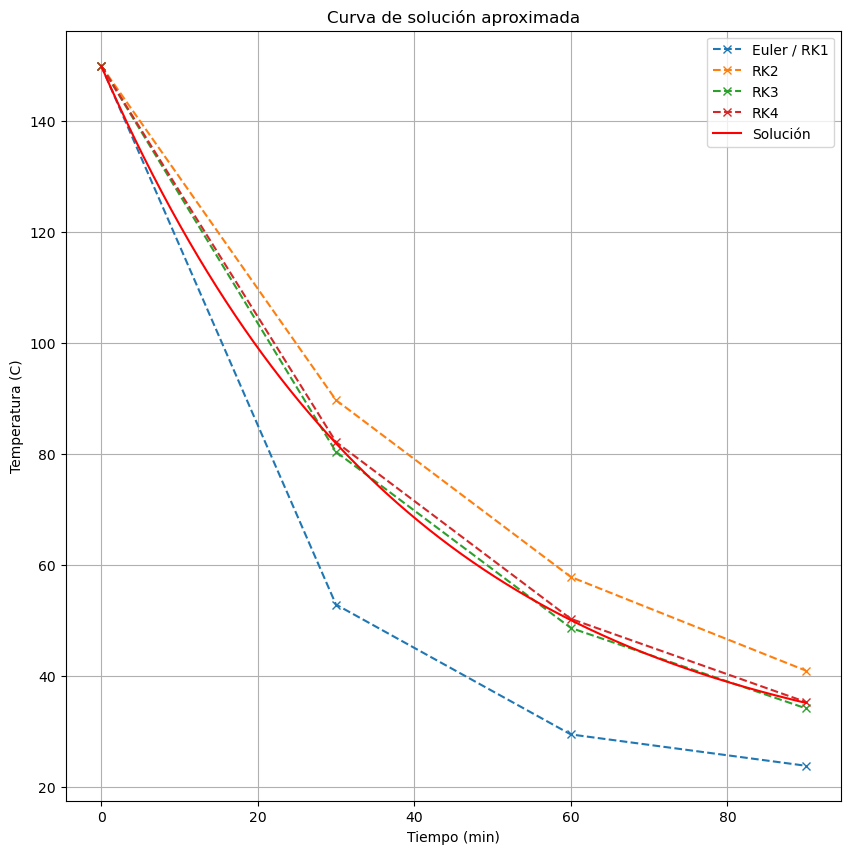

In [17]:
k = -0.0253
func = lambda t, y: k*(y- 22)
to = 0
tf = 60*1.5
yo = 150
n = 3
t,y = KR1(func,to,yo,tf, n)
t2,y2 = KR2(func,to,yo,tf, n)
t3,y3 = KR3(func,to,yo,tf, n)
t4,y4 = KR4(func,to,yo,tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t,y, 'x--', label='Euler / RK1')
plt.plot(t2,y2, 'x--', label='RK2')
plt.plot(t3,y3, 'x--', label='RK3')
plt.plot(t4,y4, 'x--', label='RK4')

# Si se tiene la curva solución
t_l = linspace(to , tf, 1000)
y_sol = lambda t: 22*np.exp(k*t)*(5.818181818181818 + np.exp(-k*t))
plt.plot(t_l,y_sol(t_l), 'r', label='Solución')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()

In [117]:
import pandas as pd

y_real = y_sol(t)
df_solu = pd.DataFrame(np.array([t,y_real,y, y2, y3, y4]).T,
                       columns=["tiempo(min)","Temperatura","y_RK1","y_RK2","y_RK3","y_RK4"])
df_solu

,tiempo(min),Temperatura,y_RK1,y_RK2,y_RK3,y_RK4
0,0.0,150.000000,150.000000,150.000000,150.000000,150.000000
1,9.0,123.934481,120.854400,124.172627,123.920773,123.935110
2,18.0,103.176863,98.345253,103.556606,103.155031,103.177864
3,27.0,86.646261,80.961439,87.100412,86.620184,86.647457
4,36.0,73.481899,67.535919,73.964688,73.454212,73.483169
5,45.0,62.998286,57.167390,63.479443,62.970727,62.999551
6,54.0,54.649524,49.159776,55.109872,54.623189,54.650732
7,63.0,48.000877,42.975495,48.429083,47.976411,48.002000
8,72.0,42.706140,38.199375,43.096319,42.683874,42.707162
9,81.0,38.489606,34.510777,38.839580,38.469660,38.490522


In [118]:
df_error = pd.DataFrame(np.array([t, abs(y-y_real), abs(y2-y_real), abs(y3-y_real), abs(y4-y_real)]).T,
                       columns=["tiempo(min)","error y_RK1","error y_RK2","error y_RK3","error y_RK4"])
df_error

,tiempo(min),error y_RK1,error y_RK2,error y_RK3,error y_RK4
0,0.0,0.000000,0.000000,0.000000,0.000000
1,9.0,3.080081,0.238146,0.013708,0.000629
2,18.0,4.831610,0.379744,0.021831,0.001002
3,27.0,5.684822,0.454151,0.026077,0.001197
4,36.0,5.945979,0.482789,0.027687,0.001271
5,45.0,5.830896,0.481156,0.027559,0.001265
6,54.0,5.489748,0.460348,0.026335,0.001209
7,63.0,5.025382,0.428206,0.024466,0.001123
8,72.0,4.506765,0.390179,0.022266,0.001022
9,81.0,3.978829,0.349974,0.019947,0.000916


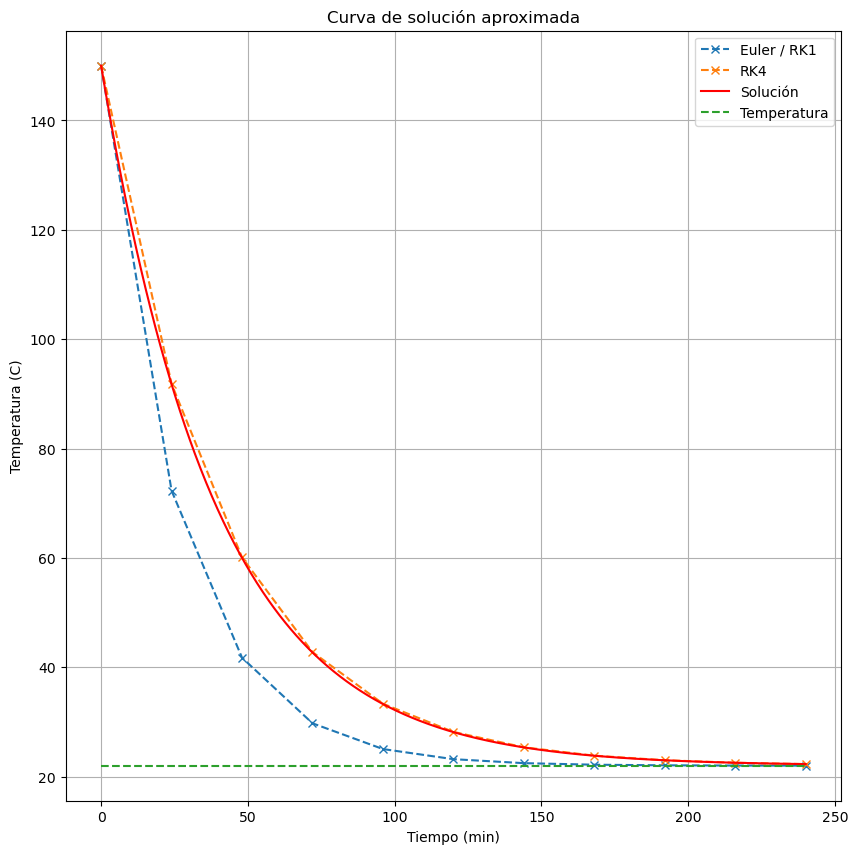

In [50]:
k = -0.0253
m = 0
d = 50
temp = lambda t: -m*np.sin(np.pi*t/d) + 22
func = lambda t, y: k*(y- temp(t))
to = 0
tf = 60*4
yo = 150
n = 10
t,y = KR1(func,to,yo,tf, n)
t2,y2 = KR2(func,to,yo,tf, n)
t3,y3 = KR3(func,to,yo,tf, n)
t4,y4 = KR4(func,to,yo,tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t,y, 'x--', label='Euler / RK1')
# plt.plot(t2,y2, 'x--', label='RK2')
# plt.plot(t3,y3, 'x--', label='RK3')
plt.plot(t4,y4, 'x--', label='RK4')

# Si se tiene la curva solución
t_l = linspace(to , tf, 1000)
y_sol = lambda t: (1/(d**2*k**2 + np.pi**2)) * (22*d**2*k**2 + 128*d**2*k**2*np.exp(k*t) + d*k*m*np.pi*np.exp(k*t) + 22*np.pi**2 + 128*np.pi**2*np.exp(k*t) - d*k*m*np.pi*np.cos(np.pi*t/d) - d**2*k**2*m*np.sin(np.pi*t/d))
plt.plot(t_l,y_sol(t_l), 'r', label='Solución')
plt.plot(t_l,temp(t_l), '--', label='Temperatura')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()